# ILO Unemployement Analysis

### Import Libraries and DataFrame

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests

In [2]:
# ILO estimates
# DONE - ILO Unemployement 2000 to 2002 
# DONE - ILO Youth NEET rate 2000 to 2017
# DONE - SDG GAP FRAME
# DONE S- WORLD DEVELOPMENT INDICATORS
# DONE - IMF WORLD ECONOMIC OUTLOOK

iloUnemployement = pd.read_excel("..\iloModelledUnemployementEstimates_2000_2022.xlsx", sheet_name="MBI_2_EN", header=5, index_col=0)
gapFrame = pd.read_excel("..\gapFrameUnemployement2018.xlsx", sheet_name="Sheet1", header=0, index_col=0)
iloNEET = pd.read_excel("..\iloYouthNEETRate_1524_2000_2017.xlsx", sheet_name="Sheet1", header=5, index_col=0)
imfWOE = pd.read_excel("..\IMF_WEOOct18.xlsx", sheet_name="Sheet1", header=0, index_col=0)


In [3]:
wdiData = pd.read_excel("..\WDIData.xlsx", sheet_name="Sheet2", header=1, index_col=0)

### Copy df

In [4]:
# Copy dataframe
a = iloUnemployement.copy().reset_index()
b = gapFrame.copy().reset_index()
c = iloNEET.reset_index()
d = imfWOE.reset_index()
e = wdiData.reset_index()

### Filter required data

#### Filter out IMF WOE

In [5]:
# IMF WOE
#     - Restructure according to abc
#     - Structure
#         - Years as a column
#         - WEO Subject Code as seperate columns
imfCountry = d["Country"].unique()
imf_Criteria = d.iloc[:, 1:6]
imf_year = d.iloc[:, 6:-1]

imfOct2018 = pd.DataFrame()

for i in imf_year.columns.unique():
    
    imf_i = d.pivot(index="Country", columns="WEO Subject Code")[i]
    imf_i["Year"] = i
    imfOct2018 = imfOct2018.append(imf_i)
    
imfOct2018.reset_index(inplace=True)

#### Filter out WDI

In [6]:
e.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,81.844982,82.407647,82.827636,83.169227,83.587141,83.954293,84.23063,84.570425,NaN,NaN


In [6]:
# WDI
#     - Restructure according to abc
#     - Structure
#         - Years as a column
#         - WEO Subject Code as seperate columns
wdiCountry = e["Country Name"].unique()
wdi_Criteria = e.iloc[:, 1:4]
wdi_year = e.iloc[:, 4:-1]

wdiOct2018 = pd.DataFrame()

for i in wdi_year.columns.unique():
    
    wdi_i = e.pivot(index="Country Name", columns="Indicator Code")[i]
    wdi_i["Year"] = float(i)
    wdiOct2018 = wdiOct2018.append(wdi_i)
    
wdiOct2018.reset_index(inplace=True)

In [8]:
# wdiOct2018.dtypes

### Merge datasets

In [7]:
ab = pd.merge(a, b, left_on="Reference area", right_on="COUNTRY", how="inner")
abc = pd.merge(ab, c, left_on=["Reference area", "Time"], right_on=["Reference area", "Time"], how="inner")
abcd = pd.merge(abc, imfOct2018, left_on=["Reference area", "Time"], right_on=["Country", "Year"], how="inner")

In [8]:
abcde = pd.merge(abcd, wdiOct2018, left_on=["Reference area", "Year"], right_on=["Country Name", "Year"], how="outer")

### Clean & Re-order dataset

In [9]:
# abc.dtypes

print("Rows: {} \nColumns: {} \nData points: {}".format(len(abcd.index), len(abcd.columns), len(abcd.columns)*len(abcd.index)))

# abcd[["Reference area", "Country"]]
abcde.drop(['COUNTRY', 'Time', 'Country'], axis=1, inplace=True)

Rows: 3039 
Columns: 74 
Data points: 224886


In [10]:
print("Rows: {} \nColumns: {} \nData points: {}\n\n".format(len(abcde.index), len(abcde.columns), len(abcde.columns)*len(abcde.index)))

Rows: 17347 
Columns: 1672 
Data points: 29004184




In [83]:
# dataset = abcd[['Reference area', 'REGION', 'GEOPOLITICS', 'Year', 'Age', 'GAP_2018', 'GAP RANK',
#        'Total Unemployment rate', 'P_Unemployed Males ', 'P_Unemployed Females',
#        'Unemployed Total (thousands)', 'Unemployed Males (thousands)',
#        'Unemployed Females (thousands)', 'Total Labour Force (thousands)',
#        'Labour Force Male (thousands)', 'Labour Force Female (thousands)', 
#        'P_NEET Total', 'P_NEET Males', 'P_NEET Females','Total NEET (thousands)', 
#         'NEET Males (thousands)', 'NEET Females (thousands)', 'BCA', 'BCA_NGDPD',
#        'FLIBOR6', 'GGR', 'GGR_NGDP', 'GGSB', 'GGSB_NPGDP', 'GGX', 'GGXCNL',
#        'GGXCNL_NGDP', 'GGXONLB', 'GGXONLB_NGDP', 'GGXWDG', 'GGXWDG_NGDP',
#        'GGXWDN', 'GGXWDN_NGDP', 'GGX_NGDP', 'LE', 'LP', 'LUR', 'NGAP_NPGDP',
#        'NGDP', 'NGDPD', 'NGDPDPC', 'NGDPPC', 'NGDPRPC', 'NGDPRPPPPC', 'NGDP_D',
#        'NGDP_FY', 'NGDP_R', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPI',
#        'PCPIE', 'PCPIEPCH', 'PCPIPCH', 'PPPEX', 'PPPGDP', 'PPPPC', 'PPPSH',
#        'TMG_RPCH', 'TM_RPCH', 'TXG_RPCH', 'TX_RPCH', 'Source Type_x', 'Source Type_y', 'Source', 'NEET Notes',]]

In [11]:
dataset = abcde[['Reference area', 'Age', 'Year',
       'Total Unemployment rate', 'P_Unemployed Males ',
       'P_Unemployed Females', 'Unemployed Total (thousands)',
       'Unemployed Males (thousands)', 'Unemployed Females (thousands)',
       'Total Labour Force (thousands)', 'Labour Force Male (thousands)',
       'Labour Force Female (thousands)', 'REGION', 'GEOPOLITICS',
       'GAP_2018', 'GAP RANK', 'P_NEET Total',
       'P_NEET Males', 'P_NEET Females', 'Total NEET (thousands)',
       'NEET Males (thousands)', 'NEET Females (thousands)',
       'BCA', 'BCA_NGDPD', 'FLIBOR6', 'GGR', 'GGR_NGDP', 'GGSB',
       'GGSB_NPGDP', 'GGX', 'GGXCNL', 'GGXCNL_NGDP', 'GGXONLB', 'GGXONLB_NGDP',
       'GGXWDG', 'GGXWDG_NGDP', 'GGXWDN', 'GGXWDN_NGDP', 'GGX_NGDP', 'LE',
       'LP', 'LUR', 'NGAP_NPGDP', 'NGDP', 'NGDPD', 'NGDPDPC', 'NGDPPC',
       'NGDPRPC', 'NGDPRPPPPC', 'NGDP_D', 'NGDP_FY', 'NGDP_R', 'NGDP_RPCH',
       'NGSD_NGDP', 'NID_NGDP', 'PCPI', 'PCPIE', 'PCPIEPCH', 'PCPIPCH',
       'PPPEX', 'PPPGDP', 'PPPPC', 'PPPSH', 'TMG_RPCH', 'TM_RPCH', 'TXG_RPCH',
       'TX_RPCH', 'AG.AGR.TRAC.NO',
       'AG.CON.FERT.PT.ZS', 'AG.CON.FERT.ZS', 'AG.LND.AGRI.K2',
       'AG.LND.AGRI.ZS', 'AG.LND.ARBL.HA', 'AG.LND.ARBL.HA.PC',
       'AG.LND.ARBL.ZS', 'AG.LND.CREL.HA', 'AG.LND.CROP.ZS',
       'AG.LND.EL5M.RU.K2', 'AG.LND.EL5M.RU.ZS', 'AG.LND.EL5M.UR.K2',
       'AG.LND.EL5M.UR.ZS', 'AG.LND.EL5M.ZS', 'AG.LND.FRST.K2',
       'AG.LND.FRST.ZS', 'AG.LND.IRIG.AG.ZS', 'AG.LND.PRCP.MM',
       'AG.LND.TOTL.K2', 'AG.LND.TOTL.RU.K2', 'AG.LND.TOTL.UR.K2',
       'AG.LND.TRAC.ZS', 'AG.PRD.CREL.MT', 'AG.PRD.CROP.XD', 'AG.PRD.FOOD.XD',
       'AG.PRD.LVSK.XD', 'AG.SRF.TOTL.K2', 'AG.YLD.CREL.KG',
       'BG.GSR.NFSV.GD.ZS', 'BM.GSR.CMCP.ZS', 'BM.GSR.FCTY.CD',
       'BM.GSR.GNFS.CD', 'BM.GSR.INSF.ZS', 'BM.GSR.MRCH.CD', 'BM.GSR.NFSV.CD',
       'BM.GSR.ROYL.CD', 'BM.GSR.TOTL.CD', 'BM.GSR.TRAN.ZS', 'BM.GSR.TRVL.ZS',
       'BM.KLT.DINV.CD.WD', 'BM.KLT.DINV.WD.GD.ZS', 'BM.TRF.PRVT.CD',
       'BM.TRF.PWKR.CD.DT', 'BN.CAB.XOKA.CD', 'BN.CAB.XOKA.GD.ZS',
       'BN.FIN.TOTL.CD', 'BN.GSR.FCTY.CD', 'BN.GSR.GNFS.CD', 'BN.GSR.MRCH.CD',
       'BN.KAC.EOMS.CD', 'BN.KLT.DINV.CD', 'BN.KLT.PTXL.CD', 'BN.RES.INCL.CD',
       'BN.TRF.CURR.CD', 'BN.TRF.KOGT.CD', 'BX.GRT.EXTA.CD.WD',
       'BX.GRT.TECH.CD.WD', 'BX.GSR.CCIS.CD', 'BX.GSR.CCIS.ZS',
       'BX.GSR.CMCP.ZS', 'BX.GSR.FCTY.CD', 'BX.GSR.GNFS.CD', 'BX.GSR.INSF.ZS',
       'BX.GSR.MRCH.CD', 'BX.GSR.NFSV.CD', 'BX.GSR.ROYL.CD', 'BX.GSR.TOTL.CD',
       'BX.GSR.TRAN.ZS', 'BX.GSR.TRVL.ZS', 'BX.KLT.DINV.CD.WD',
       'BX.KLT.DINV.WD.GD.ZS', 'BX.KLT.DREM.CD.DT', 'BX.PEF.TOTL.CD.WD',
       'BX.TRF.CURR.CD', 'BX.TRF.PWKR.CD', 'BX.TRF.PWKR.CD.DT',
       'BX.TRF.PWKR.DT.GD.ZS', 'CM.MKT.INDX.ZG', 'CM.MKT.LCAP.CD',
       'CM.MKT.LCAP.GD.ZS', 'CM.MKT.LDOM.NO', 'CM.MKT.TRAD.CD',
       'CM.MKT.TRAD.GD.ZS', 'CM.MKT.TRNR', 'DC.DAC.AUSL.CD', 'DC.DAC.AUTL.CD',
       'DC.DAC.BELL.CD', 'DC.DAC.CANL.CD', 'DC.DAC.CECL.CD', 'DC.DAC.CHEL.CD',
       'DC.DAC.CZEL.CD', 'DC.DAC.DEUL.CD', 'DC.DAC.DNKL.CD', 'DC.DAC.ESPL.CD',
       'DC.DAC.FINL.CD', 'DC.DAC.FRAL.CD', 'DC.DAC.GBRL.CD', 'DC.DAC.GRCL.CD',
       'DC.DAC.IRLL.CD', 'DC.DAC.ISLL.CD', 'DC.DAC.ITAL.CD', 'DC.DAC.JPNL.CD',
       'DC.DAC.KORL.CD', 'DC.DAC.LUXL.CD', 'DC.DAC.NLDL.CD', 'DC.DAC.NORL.CD',
       'DC.DAC.NZLL.CD', 'DC.DAC.POLL.CD', 'DC.DAC.PRTL.CD', 'DC.DAC.SVKL.CD',
       'DC.DAC.SVNL.CD', 'DC.DAC.SWEL.CD', 'DC.DAC.TOTL.CD', 'DC.DAC.USAL.CD',
       'DC.ODA.TLDC.CD', 'DC.ODA.TLDC.GN.ZS', 'DC.ODA.TOTL.CD',
       'DC.ODA.TOTL.GN.ZS', 'DC.ODA.TOTL.KD', 'DT.AMT.BLAT.CD',
       'DT.AMT.BLTC.CD', 'DT.AMT.DIMF.CD', 'DT.AMT.DLTF.CD', 'DT.AMT.DLXF.CD',
       'DT.AMT.DPNG.CD', 'DT.AMT.DPPG.CD', 'DT.AMT.MIBR.CD', 'DT.AMT.MIDA.CD',
       'DT.AMT.MLAT.CD', 'DT.AMT.MLTC.CD', 'DT.AMT.OFFT.CD', 'DT.AMT.PBND.CD',
       'DT.AMT.PCBK.CD', 'DT.AMT.PNGB.CD', 'DT.AMT.PNGC.CD', 'DT.AMT.PROP.CD',
       'DT.AMT.PRVT.CD', 'DT.AXA.DPPG.CD', 'DT.AXA.OFFT.CD', 'DT.AXA.PRVT.CD',
       'DT.AXF.DPPG.CD', 'DT.AXR.DPPG.CD', 'DT.AXR.OFFT.CD', 'DT.AXR.PRVT.CD',
       'DT.COM.DPPG.CD', 'DT.COM.MIBR.CD', 'DT.COM.MIDA.CD', 'DT.COM.OFFT.CD',
       'DT.COM.PRVT.CD', 'DT.CUR.DMAK.ZS', 'DT.CUR.EURO.ZS', 'DT.CUR.FFRC.ZS',
       'DT.CUR.JYEN.ZS', 'DT.CUR.MULC.ZS', 'DT.CUR.OTHC.ZS', 'DT.CUR.SDRW.ZS',
       'DT.CUR.SWFR.ZS', 'DT.CUR.UKPS.ZS', 'DT.CUR.USDL.ZS', 'DT.DFR.DPPG.CD',
       'DT.DIS.BLAT.CD', 'DT.DIS.BLTC.CD', 'DT.DIS.DIMF.CD', 'DT.DIS.DLTF.CD',
       'DT.DIS.DLXF.CD', 'DT.DIS.DPNG.CD', 'DT.DIS.DPPG.CD', 'DT.DIS.IDAG.CD',
       'DT.DIS.MIBR.CD', 'DT.DIS.MIDA.CD', 'DT.DIS.MLAT.CD', 'DT.DIS.MLTC.CD',
       'DT.DIS.OFFT.CD', 'DT.DIS.PBND.CD', 'DT.DIS.PCBK.CD', 'DT.DIS.PNGB.CD',
       'DT.DIS.PNGC.CD', 'DT.DIS.PROP.CD', 'DT.DIS.PRVT.CD', 'DT.DOD.ALLC.CD',
       'DT.DOD.ALLC.ZS', 'DT.DOD.BLAT.CD', 'DT.DOD.BLTC.CD', 'DT.DOD.DECT.CD',
       'DT.DOD.DECT.CD.CG', 'DT.DOD.DECT.EX.ZS', 'DT.DOD.DECT.GN.ZS',
       'DT.DOD.DIMF.CD', 'DT.DOD.DLXF.CD', 'DT.DOD.DPNG.CD', 'DT.DOD.DPPG.CD',
       'DT.DOD.DSTC.CD', 'DT.DOD.DSTC.IR.ZS', 'DT.DOD.DSTC.XP.ZS',
       'DT.DOD.DSTC.ZS', 'DT.DOD.MDRI.CD', 'DT.DOD.MIBR.CD', 'DT.DOD.MIDA.CD',
       'DT.DOD.MLAT.CD', 'DT.DOD.MLAT.ZS', 'DT.DOD.MLTC.CD', 'DT.DOD.MWBG.CD',
       'DT.DOD.OFFT.CD', 'DT.DOD.PBND.CD', 'DT.DOD.PCBK.CD', 'DT.DOD.PNGB.CD',
       'DT.DOD.PNGC.CD', 'DT.DOD.PROP.CD', 'DT.DOD.PRVS.CD', 'DT.DOD.PRVT.CD',
       'DT.DOD.PUBS.CD', 'DT.DOD.PVLX.CD', 'DT.DOD.PVLX.EX.ZS',
       'DT.DOD.PVLX.GN.ZS', 'DT.DOD.RSDL.CD', 'DT.DOD.VTOT.CD',
       'DT.DSB.DPPG.CD', 'DT.DSF.DPPG.CD', 'DT.DXR.DPPG.CD', 'DT.GPA.DPPG',
       'DT.GPA.OFFT', 'DT.GPA.PRVT', 'DT.GRE.DPPG', 'DT.GRE.OFFT',
       'DT.GRE.PRVT', 'DT.INR.DPPG', 'DT.INR.OFFT', 'DT.INR.PRVT',
       'DT.INT.BLAT.CD', 'DT.INT.BLTC.CD', 'DT.INT.DECT.CD',
       'DT.INT.DECT.EX.ZS', 'DT.INT.DECT.GN.ZS', 'DT.INT.DIMF.CD',
       'DT.INT.DLXF.CD', 'DT.INT.DPNG.CD', 'DT.INT.DPPG.CD', 'DT.INT.DSTC.CD',
       'DT.INT.MIBR.CD', 'DT.INT.MIDA.CD', 'DT.INT.MLAT.CD', 'DT.INT.MLTC.CD',
       'DT.INT.OFFT.CD', 'DT.INT.PBND.CD', 'DT.INT.PCBK.CD', 'DT.INT.PNGB.CD',
       'DT.INT.PNGC.CD', 'DT.INT.PROP.CD', 'DT.INT.PRVT.CD', 'DT.IXA.DPPG.CD',
       'DT.IXA.DPPG.CD.CG', 'DT.IXA.OFFT.CD', 'DT.IXA.PRVT.CD',
       'DT.IXF.DPPG.CD', 'DT.IXR.DPPG.CD', 'DT.IXR.OFFT.CD', 'DT.IXR.PRVT.CD',
       'DT.MAT.DPPG', 'DT.MAT.OFFT', 'DT.MAT.PRVT', 'DT.NFL.BLAT.CD',
       'DT.NFL.BLTC.CD', 'DT.NFL.BOND.CD', 'DT.NFL.DECT.CD', 'DT.NFL.DLXF.CD',
       'DT.NFL.DPNG.CD', 'DT.NFL.DPPG.CD', 'DT.NFL.DSTC.CD', 'DT.NFL.FAOG.CD',
       'DT.NFL.IAEA.CD', 'DT.NFL.IFAD.CD', 'DT.NFL.ILOG.CD', 'DT.NFL.IMFC.CD',
       'DT.NFL.IMFN.CD', 'DT.NFL.MIBR.CD', 'DT.NFL.MIDA.CD', 'DT.NFL.MLAT.CD',
       'DT.NFL.MLTC.CD', 'DT.NFL.MOTH.CD', 'DT.NFL.NEBR.CD', 'DT.NFL.NIFC.CD',
       'DT.NFL.OFFT.CD', 'DT.NFL.PBND.CD', 'DT.NFL.PCBK.CD', 'DT.NFL.PCBO.CD',
       'DT.NFL.PNGB.CD', 'DT.NFL.PNGC.CD', 'DT.NFL.PROP.CD', 'DT.NFL.PRVT.CD',
       'DT.NFL.RDBC.CD', 'DT.NFL.RDBN.CD', 'DT.NFL.UNAI.CD', 'DT.NFL.UNCF.CD',
       'DT.NFL.UNCR.CD', 'DT.NFL.UNDP.CD', 'DT.NFL.UNEC.CD', 'DT.NFL.UNFP.CD',
       'DT.NFL.UNPB.CD', 'DT.NFL.UNRW.CD', 'DT.NFL.UNTA.CD', 'DT.NFL.WFPG.CD',
       'DT.NFL.WHOL.CD', 'DT.NTR.BLAT.CD', 'DT.NTR.BLTC.CD', 'DT.NTR.DECT.CD',
       'DT.NTR.DLXF.CD', 'DT.NTR.DPNG.CD', 'DT.NTR.DPPG.CD', 'DT.NTR.MIBR.CD',
       'DT.NTR.MIDA.CD', 'DT.NTR.MLAT.CD', 'DT.NTR.MLTC.CD', 'DT.NTR.OFFT.CD',
       'DT.NTR.PBND.CD', 'DT.NTR.PCBK.CD', 'DT.NTR.PNGB.CD', 'DT.NTR.PNGC.CD',
       'DT.NTR.PROP.CD', 'DT.NTR.PRVT.CD', 'DT.ODA.ALLD.CD', 'DT.ODA.ALLD.KD',
       'DT.ODA.OATL.CD', 'DT.ODA.OATL.KD', 'DT.ODA.ODAT.CD',
       'DT.ODA.ODAT.GI.ZS', 'DT.ODA.ODAT.GN.ZS', 'DT.ODA.ODAT.KD',
       'DT.ODA.ODAT.MP.ZS', 'DT.ODA.ODAT.PC.ZS', 'DT.ODA.ODAT.XP.ZS',
       'DT.TDS.BLAT.CD', 'DT.TDS.BLTC.CD', 'DT.TDS.DECT.CD',
       'DT.TDS.DECT.EX.ZS', 'DT.TDS.DECT.GN.ZS', 'DT.TDS.DIMF.CD',
       'DT.TDS.DLXF.CD', 'DT.TDS.DPNG.CD', 'DT.TDS.DPPF.XP.ZS',
       'DT.TDS.DPPG.CD', 'DT.TDS.DPPG.GN.ZS', 'DT.TDS.DPPG.XP.ZS',
       'DT.TDS.MIBR.CD', 'DT.TDS.MIDA.CD', 'DT.TDS.MLAT.CD',
       'DT.TDS.MLAT.PG.ZS', 'DT.TDS.MLTC.CD', 'DT.TDS.OFFT.CD',
       'DT.TDS.PBND.CD', 'DT.TDS.PCBK.CD', 'DT.TDS.PNGB.CD', 'DT.TDS.PNGC.CD',
       'DT.TDS.PROP.CD', 'DT.TDS.PRVT.CD', 'DT.TXR.DPPG.CD', 'DT.UND.DPPG.CD',
       'DT.UND.OFFT.CD', 'DT.UND.PRVT.CD', 'EG.CFT.ACCS.ZS',
       'EG.EGY.PRIM.PP.KD', 'EG.ELC.ACCS.RU.ZS', 'EG.ELC.ACCS.UR.ZS',
       'EG.ELC.ACCS.ZS', 'EG.ELC.COAL.ZS', 'EG.ELC.FOSL.ZS', 'EG.ELC.HYRO.ZS',
       'EG.ELC.LOSS.ZS', 'EG.ELC.NGAS.ZS', 'EG.ELC.NUCL.ZS', 'EG.ELC.PETR.ZS',
       'EG.ELC.RNEW.ZS', 'EG.ELC.RNWX.KH', 'EG.ELC.RNWX.ZS', 'EG.FEC.RNEW.ZS',
       'EG.GDP.PUSE.KO.PP', 'EG.GDP.PUSE.KO.PP.KD', 'EG.IMP.CONS.ZS',
       'EG.USE.COMM.CL.ZS', 'EG.USE.COMM.FO.ZS', 'EG.USE.COMM.GD.PP.KD',
       'EG.USE.CRNW.ZS', 'EG.USE.ELEC.KH.PC', 'EG.USE.PCAP.KG.OE',
       'EN.ATM.CO2E.EG.ZS', 'EN.ATM.CO2E.GF.KT', 'EN.ATM.CO2E.GF.ZS',
       'EN.ATM.CO2E.KD.GD', 'EN.ATM.CO2E.KT', 'EN.ATM.CO2E.LF.KT',
       'EN.ATM.CO2E.LF.ZS', 'EN.ATM.CO2E.PC', 'EN.ATM.CO2E.PP.GD',
       'EN.ATM.CO2E.PP.GD.KD', 'EN.ATM.CO2E.SF.KT', 'EN.ATM.CO2E.SF.ZS',
       'EN.ATM.GHGO.KT.CE', 'EN.ATM.GHGO.ZG', 'EN.ATM.GHGT.KT.CE',
       'EN.ATM.GHGT.ZG', 'EN.ATM.HFCG.KT.CE', 'EN.ATM.METH.AG.KT.CE',
       'EN.ATM.METH.AG.ZS', 'EN.ATM.METH.EG.KT.CE', 'EN.ATM.METH.EG.ZS',
       'EN.ATM.METH.KT.CE', 'EN.ATM.METH.ZG', 'EN.ATM.NOXE.AG.KT.CE',
       'EN.ATM.NOXE.AG.ZS', 'EN.ATM.NOXE.EG.KT.CE', 'EN.ATM.NOXE.EG.ZS',
       'EN.ATM.NOXE.KT.CE', 'EN.ATM.NOXE.ZG', 'EN.ATM.PFCG.KT.CE',
       'EN.ATM.PM25.MC.M3', 'EN.ATM.PM25.MC.T1.ZS', 'EN.ATM.PM25.MC.T2.ZS',
       'EN.ATM.PM25.MC.T3.ZS', 'EN.ATM.PM25.MC.ZS', 'EN.ATM.SF6G.KT.CE',
       'EN.BIR.THRD.NO', 'EN.CLC.DRSK.XQ', 'EN.CLC.GHGR.MT.CE',
       'EN.CLC.MDAT.ZS', 'EN.CO2.BLDG.ZS', 'EN.CO2.ETOT.ZS', 'EN.CO2.MANF.ZS',
       'EN.CO2.OTHX.ZS', 'EN.CO2.TRAN.ZS', 'EN.FSH.THRD.NO', 'EN.HPT.THRD.NO',
       'EN.MAM.THRD.NO', 'EN.POP.DNST', 'EN.POP.EL5M.RU.ZS',
       'EN.POP.EL5M.UR.ZS', 'EN.POP.EL5M.ZS', 'EN.POP.SLUM.UR.ZS',
       'EN.URB.LCTY', 'EN.URB.LCTY.UR.ZS', 'EN.URB.MCTY', 'EN.URB.MCTY.TL.ZS',
       'EP.PMP.DESL.CD', 'EP.PMP.SGAS.CD', 'ER.FSH.AQUA.MT', 'ER.FSH.CAPT.MT',
       'ER.FSH.PROD.MT', 'ER.GDP.FWTL.M3.KD', 'ER.H2O.FWAG.ZS',
       'ER.H2O.FWDM.ZS', 'ER.H2O.FWIN.ZS', 'ER.H2O.FWST.ZS', 'ER.H2O.FWTL.K3',
       'ER.H2O.FWTL.ZS', 'ER.H2O.INTR.K3', 'ER.H2O.INTR.PC', 'ER.LND.PTLD.ZS',
       'ER.MRN.PTMR.ZS', 'ER.PTD.TOTL.ZS', 'FB.AST.NPER.ZS', 'FB.ATM.TOTL.P5',
       'FB.BNK.CAPA.ZS', 'FB.CBK.BRCH.P5', 'FB.CBK.BRWR.P3', 'FB.CBK.DPTR.P3',
       'FD.AST.PRVT.GD.ZS', 'FD.RES.LIQU.AS.ZS', 'FI.RES.TOTL.CD',
       'FI.RES.TOTL.DT.ZS', 'FI.RES.TOTL.MO', 'FI.RES.XGLD.CD',
       'FM.AST.CGOV.ZG.M3', 'FM.AST.DOMO.ZG.M3', 'FM.AST.DOMS.CN',
       'FM.AST.NFRG.CN', 'FM.AST.PRVT.ZG.M3', 'FM.LBL.BMNY.CN',
       'FM.LBL.BMNY.GD.ZS', 'FM.LBL.BMNY.IR.ZS', 'FM.LBL.BMNY.ZG',
       'FP.CPI.TOTL', 'FP.CPI.TOTL.ZG', 'FP.WPI.TOTL', 'FR.INR.DPST',
       'FR.INR.LEND', 'FR.INR.LNDP', 'FR.INR.RINR', 'FR.INR.RISK',
       'FS.AST.CGOV.GD.ZS', 'FS.AST.DOMO.GD.ZS', 'FS.AST.DOMS.GD.ZS',
       'FS.AST.PRVT.GD.ZS', 'FX.OWN.TOTL.40.ZS', 'FX.OWN.TOTL.60.ZS',
       'FX.OWN.TOTL.FE.ZS', 'FX.OWN.TOTL.MA.ZS', 'FX.OWN.TOTL.OL.ZS',
       'FX.OWN.TOTL.PL.ZS', 'FX.OWN.TOTL.SO.ZS', 'FX.OWN.TOTL.YG.ZS',
       'FX.OWN.TOTL.ZS', 'GB.XPD.RSDV.GD.ZS', 'GC.AST.TOTL.CN',
       'GC.AST.TOTL.GD.ZS', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS',
       'GC.LBL.TOTL.CN', 'GC.LBL.TOTL.GD.ZS', 'GC.NFN.TOTL.CN',
       'GC.NFN.TOTL.GD.ZS', 'GC.NLD.TOTL.CN', 'GC.NLD.TOTL.GD.ZS',
       'GC.REV.GOTR.CN', 'GC.REV.GOTR.ZS', 'GC.REV.SOCL.CN', 'GC.REV.SOCL.ZS',
       'GC.REV.XGRT.CN', 'GC.REV.XGRT.GD.ZS', 'GC.TAX.EXPT.CN',
       'GC.TAX.EXPT.ZS', 'GC.TAX.GSRV.CN', 'GC.TAX.GSRV.RV.ZS',
       'GC.TAX.GSRV.VA.ZS', 'GC.TAX.IMPT.CN', 'GC.TAX.IMPT.ZS',
       'GC.TAX.INTT.CN', 'GC.TAX.INTT.RV.ZS', 'GC.TAX.OTHR.CN',
       'GC.TAX.OTHR.RV.ZS', 'GC.TAX.TOTL.CN', 'GC.TAX.TOTL.GD.ZS',
       'GC.TAX.YPKG.CN', 'GC.TAX.YPKG.RV.ZS', 'GC.TAX.YPKG.ZS',
       'GC.XPN.COMP.CN', 'GC.XPN.COMP.ZS', 'GC.XPN.GSRV.CN', 'GC.XPN.GSRV.ZS',
       'GC.XPN.INTP.CN', 'GC.XPN.INTP.RV.ZS', 'GC.XPN.INTP.ZS',
       'GC.XPN.OTHR.CN', 'GC.XPN.OTHR.ZS', 'GC.XPN.TOTL.CN',
       'GC.XPN.TOTL.GD.ZS', 'GC.XPN.TRFT.CN', 'GC.XPN.TRFT.ZS', 'HD.HCI.OVRL',
       'HD.HCI.OVRL.FE', 'HD.HCI.OVRL.LB', 'HD.HCI.OVRL.LB.FE',
       'HD.HCI.OVRL.LB.MA', 'HD.HCI.OVRL.MA', 'HD.HCI.OVRL.UB',
       'HD.HCI.OVRL.UB.FE', 'HD.HCI.OVRL.UB.MA', 'IC.BUS.DFRN.XQ',
       'IC.BUS.DISC.XQ', 'IC.BUS.EASE.XQ', 'IC.BUS.NDNS.ZS', 'IC.BUS.NREG',
       'IC.CRD.INFO.XQ', 'IC.CRD.PRVT.ZS', 'IC.CRD.PUBL.ZS', 'IC.CUS.DURS.EX',
       'IC.ELC.DURS', 'IC.ELC.OUTG', 'IC.ELC.OUTG.ZS', 'IC.ELC.TIME',
       'IC.EXP.COST.CD', 'IC.EXP.CSBC.CD', 'IC.EXP.CSDC.CD', 'IC.EXP.DOCS',
       'IC.EXP.DURS', 'IC.EXP.TMBC', 'IC.EXP.TMDC', 'IC.FRM.BKWC.ZS',
       'IC.FRM.BNKS.ZS', 'IC.FRM.BRIB.ZS', 'IC.FRM.CMPU.ZS', 'IC.FRM.CORR.ZS',
       'IC.FRM.CRIM.ZS', 'IC.FRM.DURS', 'IC.FRM.FEMM.ZS', 'IC.FRM.FEMO.ZS',
       'IC.FRM.FREG.ZS', 'IC.FRM.INFM.ZS', 'IC.FRM.METG.ZS', 'IC.FRM.OUTG.ZS',
       'IC.FRM.RSDV.ZS', 'IC.FRM.THEV.ZS', 'IC.FRM.TRNG.ZS', 'IC.GOV.DURS.ZS',
       'IC.IMP.COST.CD', 'IC.IMP.CSBC.CD', 'IC.IMP.CSDC.CD', 'IC.IMP.DOCS',
       'IC.IMP.DURS', 'IC.IMP.TMBC', 'IC.IMP.TMDC', 'IC.ISV.DURS',
       'IC.LGL.CRED.XQ', 'IC.LGL.DURS', 'IC.PRP.DURS', 'IC.PRP.PROC',
       'IC.REG.COST.PC.FE.ZS', 'IC.REG.COST.PC.MA.ZS', 'IC.REG.COST.PC.ZS',
       'IC.REG.DURS', 'IC.REG.DURS.FE', 'IC.REG.DURS.MA', 'IC.REG.PROC',
       'IC.REG.PROC.FE', 'IC.REG.PROC.MA', 'IC.TAX.DURS', 'IC.TAX.GIFT.ZS',
       'IC.TAX.LABR.CP.ZS', 'IC.TAX.METG', 'IC.TAX.OTHR.CP.ZS', 'IC.TAX.PAYM',
       'IC.TAX.PRFT.CP.ZS', 'IC.TAX.TOTL.CP.ZS', 'IC.WRH.DURS', 'IC.WRH.PROC',
       'IE.PPI.ENGY.CD', 'IE.PPI.ICTI.CD', 'IE.PPI.TRAN.CD', 'IE.PPI.WATR.CD',
       'IE.PPN.ENGY.CD', 'IE.PPN.ICTI.CD', 'IE.PPN.TRAN.CD', 'IE.PPN.WATR.CD',
       'IP.IDS.NRCT', 'IP.IDS.RSCT', 'IP.JRN.ARTC.SC', 'IP.PAT.NRES',
       'IP.PAT.RESD', 'IP.TMK.NRCT', 'IP.TMK.NRES', 'IP.TMK.RESD',
       'IP.TMK.RSCT', 'IP.TMK.TOTL', 'IQ.CPA.BREG.XQ', 'IQ.CPA.DEBT.XQ',
       'IQ.CPA.ECON.XQ', 'IQ.CPA.ENVR.XQ', 'IQ.CPA.FINQ.XQ', 'IQ.CPA.FINS.XQ',
       'IQ.CPA.FISP.XQ', 'IQ.CPA.GNDR.XQ', 'IQ.CPA.HRES.XQ', 'IQ.CPA.IRAI.XQ',
       'IQ.CPA.MACR.XQ', 'IQ.CPA.PADM.XQ', 'IQ.CPA.PRES.XQ', 'IQ.CPA.PROP.XQ',
       'IQ.CPA.PROT.XQ', 'IQ.CPA.PUBS.XQ', 'IQ.CPA.REVN.XQ', 'IQ.CPA.SOCI.XQ',
       'IQ.CPA.STRC.XQ', 'IQ.CPA.TRAD.XQ', 'IQ.CPA.TRAN.XQ', 'IQ.SCI.MTHD',
       'IQ.SCI.OVRL', 'IQ.SCI.PRDC', 'IQ.SCI.SRCE', 'IQ.WEF.CUST.XQ',
       'IQ.WEF.PORT.XQ', 'IS.AIR.DPRT', 'IS.AIR.GOOD.MT.K1', 'IS.AIR.PSGR',
       'IS.RRS.GOOD.MT.K6', 'IS.RRS.PASG.KM', 'IS.RRS.TOTL.KM',
       'IS.SHP.GCNW.XQ', 'IS.SHP.GOOD.TU', 'IT.CEL.SETS', 'IT.CEL.SETS.P2',
       'IT.MLT.MAIN', 'IT.MLT.MAIN.P2', 'IT.NET.BBND', 'IT.NET.BBND.P2',
       'IT.NET.SECR', 'IT.NET.SECR.P6', 'IT.NET.USER.ZS', 'LP.EXP.DURS.MD',
       'LP.IMP.DURS.MD', 'LP.LPI.CUST.XQ', 'LP.LPI.INFR.XQ', 'LP.LPI.ITRN.XQ',
       'LP.LPI.LOGS.XQ', 'LP.LPI.OVRL.XQ', 'LP.LPI.TIME.XQ', 'LP.LPI.TRAC.XQ',
       'MS.MIL.MPRT.KD', 'MS.MIL.TOTL.P1', 'MS.MIL.TOTL.TF.ZS',
       'MS.MIL.XPND.CD', 'MS.MIL.XPND.CN', 'MS.MIL.XPND.GD.ZS',
       'MS.MIL.XPND.ZS', 'MS.MIL.XPRT.KD', 'NE.CON.GOVT.CD', 'NE.CON.GOVT.CN',
       'NE.CON.GOVT.KD', 'NE.CON.GOVT.KD.ZG', 'NE.CON.GOVT.KN',
       'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'NE.CON.PRVT.KD',
       'NE.CON.PRVT.KD.ZG', 'NE.CON.PRVT.KN', 'NE.CON.PRVT.PC.KD',
       'NE.CON.PRVT.PC.KD.ZG', 'NE.CON.PRVT.PP.CD', 'NE.CON.PRVT.PP.KD',
       'NE.CON.PRVT.ZS', 'NE.CON.TOTL.CD', 'NE.CON.TOTL.CN', 'NE.CON.TOTL.KD',
       'NE.CON.TOTL.KD.ZG', 'NE.CON.TOTL.KN', 'NE.CON.TOTL.ZS',
       'NE.DAB.DEFL.ZS', 'NE.DAB.TOTL.CD', 'NE.DAB.TOTL.CN', 'NE.DAB.TOTL.KD',
       'NE.DAB.TOTL.KN', 'NE.DAB.TOTL.ZS', 'NE.EXP.GNFS.CD', 'NE.EXP.GNFS.CN',
       'NE.EXP.GNFS.KD', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN',
       'NE.EXP.GNFS.ZS', 'NE.GDI.FPRV.CN', 'NE.GDI.FPRV.ZS', 'NE.GDI.FTOT.CD',
       'NE.GDI.FTOT.CN', 'NE.GDI.FTOT.KD', 'NE.GDI.FTOT.KD.ZG',
       'NE.GDI.FTOT.KN', 'NE.GDI.FTOT.ZS', 'NE.GDI.STKB.CD', 'NE.GDI.STKB.CN',
       'NE.GDI.STKB.KN', 'NE.GDI.TOTL.CD', 'NE.GDI.TOTL.CN', 'NE.GDI.TOTL.KD',
       'NE.GDI.TOTL.KD.ZG', 'NE.GDI.TOTL.KN', 'NE.GDI.TOTL.ZS',
       'NE.IMP.GNFS.CD', 'NE.IMP.GNFS.CN', 'NE.IMP.GNFS.KD',
       'NE.IMP.GNFS.KD.ZG', 'NE.IMP.GNFS.KN', 'NE.IMP.GNFS.ZS',
       'NE.RSB.GNFS.CD', 'NE.RSB.GNFS.CN', 'NE.RSB.GNFS.KN', 'NE.RSB.GNFS.ZS',
       'NE.TRD.GNFS.ZS', 'NV.AGR.EMPL.KD', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN',
       'NV.AGR.TOTL.KD', 'NV.AGR.TOTL.KD.ZG', 'NV.AGR.TOTL.KN',
       'NV.AGR.TOTL.ZS', 'NV.FSM.TOTL.CN', 'NV.FSM.TOTL.KN', 'NV.IND.EMPL.KD',
       'NV.IND.MANF.CD', 'NV.IND.MANF.CN', 'NV.IND.MANF.KD',
       'NV.IND.MANF.KD.ZG', 'NV.IND.MANF.KN', 'NV.IND.MANF.ZS',
       'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.IND.TOTL.KD',
       'NV.IND.TOTL.KD.ZG', 'NV.IND.TOTL.KN', 'NV.IND.TOTL.ZS',
       'NV.MNF.CHEM.ZS.UN', 'NV.MNF.FBTO.ZS.UN', 'NV.MNF.MTRN.ZS.UN',
       'NV.MNF.OTHR.ZS.UN', 'NV.MNF.TECH.ZS.UN', 'NV.MNF.TXTL.ZS.UN',
       'NV.SRV.EMPL.KD', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'NV.SRV.TOTL.KD',
       'NV.SRV.TOTL.KD.ZG', 'NV.SRV.TOTL.KN', 'NV.SRV.TOTL.ZS',
       'NY.ADJ.AEDU.CD', 'NY.ADJ.AEDU.GN.ZS', 'NY.ADJ.DCO2.CD',
       'NY.ADJ.DCO2.GN.ZS', 'NY.ADJ.DFOR.CD', 'NY.ADJ.DFOR.GN.ZS',
       'NY.ADJ.DKAP.CD', 'NY.ADJ.DKAP.GN.ZS', 'NY.ADJ.DMIN.CD',
       'NY.ADJ.DMIN.GN.ZS', 'NY.ADJ.DNGY.CD', 'NY.ADJ.DNGY.GN.ZS',
       'NY.ADJ.DPEM.CD', 'NY.ADJ.DPEM.GN.ZS', 'NY.ADJ.DRES.GN.ZS',
       'NY.ADJ.ICTR.GN.ZS', 'NY.ADJ.NNAT.CD', 'NY.ADJ.NNAT.GN.ZS',
       'NY.ADJ.NNTY.CD', 'NY.ADJ.NNTY.KD', 'NY.ADJ.NNTY.KD.ZG',
       'NY.ADJ.NNTY.PC.CD', 'NY.ADJ.NNTY.PC.KD', 'NY.ADJ.NNTY.PC.KD.ZG',
       'NY.ADJ.SVNG.CD', 'NY.ADJ.SVNG.GN.ZS', 'NY.ADJ.SVNX.CD',
       'NY.ADJ.SVNX.GN.ZS', 'NY.EXP.CAPM.KN', 'NY.GDP.COAL.RT.ZS',
       'NY.GDP.DEFL.KD.ZG', 'NY.GDP.DEFL.KD.ZG.AD', 'NY.GDP.DEFL.ZS',
       'NY.GDP.DEFL.ZS.AD', 'NY.GDP.DISC.CN', 'NY.GDP.DISC.KN',
       'NY.GDP.FCST.CD', 'NY.GDP.FCST.CN', 'NY.GDP.FCST.KD', 'NY.GDP.FCST.KN',
       'NY.GDP.FRST.RT.ZS', 'NY.GDP.MINR.RT.ZS', 'NY.GDP.MKTP.CD',
       'NY.GDP.MKTP.CN', 'NY.GDP.MKTP.CN.AD', 'NY.GDP.MKTP.KD',
       'NY.GDP.MKTP.KD.ZG', 'NY.GDP.MKTP.KN', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GDP.NGAS.RT.ZS', 'NY.GDP.PCAP.CD',
       'NY.GDP.PCAP.CN', 'NY.GDP.PCAP.KD', 'NY.GDP.PCAP.KD.ZG',
       'NY.GDP.PCAP.KN', 'NY.GDP.PCAP.PP.CD', 'NY.GDP.PCAP.PP.KD',
       'NY.GDP.PETR.RT.ZS', 'NY.GDP.TOTL.RT.ZS', 'NY.GDS.TOTL.CD',
       'NY.GDS.TOTL.CN', 'NY.GDS.TOTL.ZS', 'NY.GDY.TOTL.KN', 'NY.GNP.ATLS.CD',
       'NY.GNP.MKTP.CD', 'NY.GNP.MKTP.CN', 'NY.GNP.MKTP.KD',
       'NY.GNP.MKTP.KD.ZG', 'NY.GNP.MKTP.KN', 'NY.GNP.MKTP.PP.CD',
       'NY.GNP.MKTP.PP.KD', 'NY.GNP.PCAP.CD', 'NY.GNP.PCAP.CN',
       'NY.GNP.PCAP.KD', 'NY.GNP.PCAP.KD.ZG', 'NY.GNP.PCAP.KN',
       'NY.GNP.PCAP.PP.CD', 'NY.GNP.PCAP.PP.KD', 'NY.GNS.ICTR.CD',
       'NY.GNS.ICTR.CN', 'NY.GNS.ICTR.GN.ZS', 'NY.GNS.ICTR.ZS',
       'NY.GSR.NFCY.CD', 'NY.GSR.NFCY.CN', 'NY.GSR.NFCY.KN', 'NY.TAX.NIND.CD',
       'NY.TAX.NIND.CN', 'NY.TAX.NIND.KN', 'NY.TRF.NCTR.CD', 'NY.TRF.NCTR.CN',
       'NY.TRF.NCTR.KN', 'NY.TTF.GNFS.KN', 'PA.NUS.ATLS', 'PA.NUS.FCRF',
       'PA.NUS.PPP', 'PA.NUS.PPP.05', 'PA.NUS.PPPC.RF', 'PA.NUS.PRVT.PP',
       'PA.NUS.PRVT.PP.05', 'PX.REX.REER', 'SE.ADT.1524.LT.FE.ZS',
       'SE.ADT.1524.LT.FM.ZS', 'SE.ADT.1524.LT.MA.ZS', 'SE.ADT.1524.LT.ZS',
       'SE.ADT.LITR.FE.ZS', 'SE.ADT.LITR.MA.ZS', 'SE.ADT.LITR.ZS',
       'SE.COM.DURS', 'SE.ENR.PRIM.FM.ZS', 'SE.ENR.PRSC.FM.ZS',
       'SE.ENR.SECO.FM.ZS', 'SE.ENR.TERT.FM.ZS', 'SE.PRE.DURS',
       'SE.PRE.ENRL.TC.ZS', 'SE.PRE.ENRR', 'SE.PRE.ENRR.FE', 'SE.PRE.ENRR.MA',
       'SE.PRE.TCAQ.FE.ZS', 'SE.PRE.TCAQ.MA.ZS', 'SE.PRE.TCAQ.ZS',
       'SE.PRM.AGES', 'SE.PRM.CMPT.FE.ZS', 'SE.PRM.CMPT.MA.ZS',
       'SE.PRM.CMPT.ZS', 'SE.PRM.CUAT.FE.ZS', 'SE.PRM.CUAT.MA.ZS',
       'SE.PRM.CUAT.ZS', 'SE.PRM.DURS', 'SE.PRM.ENRL', 'SE.PRM.ENRL.FE.ZS',
       'SE.PRM.ENRL.TC.ZS', 'SE.PRM.ENRR', 'SE.PRM.ENRR.FE', 'SE.PRM.ENRR.MA',
       'SE.PRM.GINT.FE.ZS', 'SE.PRM.GINT.MA.ZS', 'SE.PRM.GINT.ZS',
       'SE.PRM.NENR', 'SE.PRM.NENR.FE', 'SE.PRM.NENR.MA', 'SE.PRM.NINT.FE.ZS',
       'SE.PRM.NINT.MA.ZS', 'SE.PRM.NINT.ZS', 'SE.PRM.OENR.FE.ZS',
       'SE.PRM.OENR.MA.ZS', 'SE.PRM.OENR.ZS', 'SE.PRM.PRIV.ZS',
       'SE.PRM.PRS5.FE.ZS', 'SE.PRM.PRS5.MA.ZS', 'SE.PRM.PRS5.ZS',
       'SE.PRM.PRSL.FE.ZS', 'SE.PRM.PRSL.MA.ZS', 'SE.PRM.PRSL.ZS',
       'SE.PRM.REPT.FE.ZS', 'SE.PRM.REPT.MA.ZS', 'SE.PRM.REPT.ZS',
       'SE.PRM.TCAQ.FE.ZS', 'SE.PRM.TCAQ.MA.ZS', 'SE.PRM.TCAQ.ZS',
       'SE.PRM.TCHR', 'SE.PRM.TCHR.FE.ZS', 'SE.PRM.TENR', 'SE.PRM.TENR.FE',
       'SE.PRM.TENR.MA', 'SE.PRM.UNER', 'SE.PRM.UNER.FE', 'SE.PRM.UNER.FE.ZS',
       'SE.PRM.UNER.MA', 'SE.PRM.UNER.MA.ZS', 'SE.PRM.UNER.ZS', 'SE.SEC.AGES',
       'SE.SEC.CMPT.LO.FE.ZS', 'SE.SEC.CMPT.LO.MA.ZS', 'SE.SEC.CMPT.LO.ZS',
       'SE.SEC.CUAT.LO.FE.ZS', 'SE.SEC.CUAT.LO.MA.ZS', 'SE.SEC.CUAT.LO.ZS',
       'SE.SEC.CUAT.PO.FE.ZS', 'SE.SEC.CUAT.PO.MA.ZS', 'SE.SEC.CUAT.PO.ZS',
       'SE.SEC.CUAT.UP.FE.ZS', 'SE.SEC.CUAT.UP.MA.ZS', 'SE.SEC.CUAT.UP.ZS',
       'SE.SEC.DURS', 'SE.SEC.ENRL', 'SE.SEC.ENRL.FE.ZS', 'SE.SEC.ENRL.GC',
       'SE.SEC.ENRL.GC.FE.ZS', 'SE.SEC.ENRL.LO.TC.ZS', 'SE.SEC.ENRL.TC.ZS',
       'SE.SEC.ENRL.UP.TC.ZS', 'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.FE.ZS',
       'SE.SEC.ENRR', 'SE.SEC.ENRR.FE', 'SE.SEC.ENRR.MA', 'SE.SEC.NENR',
       'SE.SEC.NENR.FE', 'SE.SEC.NENR.MA', 'SE.SEC.PRIV.ZS',
       'SE.SEC.PROG.FE.ZS', 'SE.SEC.PROG.MA.ZS', 'SE.SEC.PROG.ZS',
       'SE.SEC.TCAQ.FE.ZS', 'SE.SEC.TCAQ.LO.FE.ZS', 'SE.SEC.TCAQ.LO.MA.ZS',
       'SE.SEC.TCAQ.LO.ZS', 'SE.SEC.TCAQ.MA.ZS', 'SE.SEC.TCAQ.UP.FE.ZS',
       'SE.SEC.TCAQ.UP.MA.ZS', 'SE.SEC.TCAQ.UP.ZS', 'SE.SEC.TCAQ.ZS',
       'SE.SEC.TCHR', 'SE.SEC.TCHR.FE', 'SE.SEC.TCHR.FE.ZS',
       'SE.SEC.UNER.LO.FE.ZS', 'SE.SEC.UNER.LO.MA.ZS', 'SE.SEC.UNER.LO.ZS',
       'SE.TER.CUAT.BA.FE.ZS', 'SE.TER.CUAT.BA.MA.ZS', 'SE.TER.CUAT.BA.ZS',
       'SE.TER.CUAT.DO.FE.ZS', 'SE.TER.CUAT.DO.MA.ZS', 'SE.TER.CUAT.DO.ZS',
       'SE.TER.CUAT.MS.FE.ZS', 'SE.TER.CUAT.MS.MA.ZS', 'SE.TER.CUAT.MS.ZS',
       'SE.TER.CUAT.ST.FE.ZS', 'SE.TER.CUAT.ST.MA.ZS', 'SE.TER.CUAT.ST.ZS',
       'SE.TER.ENRL.TC.ZS', 'SE.TER.ENRR', 'SE.TER.ENRR.FE', 'SE.TER.ENRR.MA',
       'SE.TER.TCHR.FE.ZS', 'SE.XPD.CPRM.ZS', 'SE.XPD.CSEC.ZS',
       'SE.XPD.CTER.ZS', 'SE.XPD.CTOT.ZS', 'SE.XPD.MPRM.ZS', 'SE.XPD.MSEC.ZS',
       'SE.XPD.MTER.ZS', 'SE.XPD.MTOT.ZS', 'SE.XPD.PRIM.PC.ZS',
       'SE.XPD.PRIM.ZS', 'SE.XPD.SECO.PC.ZS', 'SE.XPD.SECO.ZS',
       'SE.XPD.TERT.PC.ZS', 'SE.XPD.TERT.ZS', 'SE.XPD.TOTL.GB.ZS',
       'SE.XPD.TOTL.GD.ZS', 'SG.DMK.ALLD.FN.ZS', 'SG.DMK.SRCR.FN.ZS',
       'SG.GEN.PARL.ZS', 'SG.JOB.NOPN.EQ', 'SG.LAW.CHMR', 'SG.LAW.EQRM.WK',
       'SG.LAW.LEVE.PU', 'SG.LAW.NODC.HR', 'SG.LEG.DVAW', 'SG.MMR.LEVE.EP',
       'SG.NOD.CONS', 'SG.TIM.UWRK.FE', 'SG.TIM.UWRK.MA', 'SG.VAW.1549.ZS',
       'SG.VAW.ARGU.ZS', 'SG.VAW.BURN.ZS', 'SG.VAW.GOES.ZS', 'SG.VAW.NEGL.ZS',
       'SG.VAW.REAS.ZS', 'SG.VAW.REFU.ZS', 'SH.ALC.PCAP.LI', 'SH.ANM.ALLW.ZS',
       'SH.ANM.CHLD.ZS', 'SH.ANM.NPRG.ZS', 'SH.CON.1524.FE.ZS',
       'SH.CON.1524.MA.ZS', 'SH.DTH.0514', 'SH.DTH.COMM.ZS', 'SH.DTH.IMRT',
       'SH.DTH.INJR.ZS', 'SH.DTH.MORT', 'SH.DTH.NCOM.ZS', 'SH.DTH.NMRT',
       'SH.DYN.0514', 'SH.DYN.AIDS.FE.ZS', 'SH.DYN.AIDS.ZS', 'SH.DYN.MORT',
       'SH.DYN.MORT.FE', 'SH.DYN.MORT.MA', 'SH.DYN.NCOM.ZS', 'SH.DYN.NMRT',
       'SH.FPL.SATM.ZS', 'SH.H2O.BASW.RU.ZS', 'SH.H2O.BASW.UR.ZS',
       'SH.H2O.BASW.ZS', 'SH.H2O.SMDW.RU.ZS', 'SH.H2O.SMDW.UR.ZS',
       'SH.H2O.SMDW.ZS', 'SH.HIV.0014', 'SH.HIV.1524.FE.ZS',
       'SH.HIV.1524.MA.ZS', 'SH.HIV.ARTC.ZS', 'SH.HIV.INCD', 'SH.HIV.INCD.14',
       'SH.HIV.INCD.TL', 'SH.HIV.INCD.ZS', 'SH.HIV.PMTC.ZS', 'SH.IMM.HEPB',
       'SH.IMM.IDPT', 'SH.IMM.MEAS', 'SH.MED.BEDS.ZS', 'SH.MED.CMHW.P3',
       'SH.MED.NUMW.P3', 'SH.MED.PHYS.ZS', 'SH.MED.SAOP.P5', 'SH.MLR.INCD.P3',
       'SH.MLR.NETS.ZS', 'SH.MLR.TRET.ZS', 'SH.MMR.DTHS', 'SH.MMR.RISK',
       'SH.MMR.RISK.ZS', 'SH.PRG.ANEM', 'SH.PRV.SMOK', 'SH.PRV.SMOK.FE',
       'SH.PRV.SMOK.MA', 'SH.SGR.CRSK.ZS', 'SH.SGR.IRSK.ZS', 'SH.SGR.PROC.P5',
       'SH.STA.AIRP.P5', 'SH.STA.ANVC.ZS', 'SH.STA.ARIC.ZS',
       'SH.STA.BASS.RU.ZS', 'SH.STA.BASS.UR.ZS', 'SH.STA.BASS.ZS',
       'SH.STA.BFED.ZS', 'SH.STA.BRTC.ZS', 'SH.STA.BRTW.ZS', 'SH.STA.DIAB.ZS',
       'SH.STA.FGMS.ZS', 'SH.STA.HYGN.RU.ZS', 'SH.STA.HYGN.UR.ZS',
       'SH.STA.HYGN.ZS', 'SH.STA.MALN.FE.ZS', 'SH.STA.MALN.MA.ZS',
       'SH.STA.MALN.ZS', 'SH.STA.MMRT', 'SH.STA.MMRT.NE', 'SH.STA.ODFC.RU.ZS',
       'SH.STA.ODFC.UR.ZS', 'SH.STA.ODFC.ZS', 'SH.STA.ORCF.ZS', 'SH.STA.ORTH',
       'SH.STA.OWGH.FE.ZS', 'SH.STA.OWGH.MA.ZS', 'SH.STA.OWGH.ZS',
       'SH.STA.POIS.P5', 'SH.STA.POIS.P5.FE', 'SH.STA.POIS.P5.MA',
       'SH.STA.SMSS.RU.ZS', 'SH.STA.SMSS.UR.ZS', 'SH.STA.SMSS.ZS',
       'SH.STA.STNT.FE.ZS', 'SH.STA.STNT.MA.ZS', 'SH.STA.STNT.ZS',
       'SH.STA.SUIC.P5', 'SH.STA.TRAF.P5', 'SH.STA.WASH.P5',
       'SH.STA.WAST.FE.ZS', 'SH.STA.WAST.MA.ZS', 'SH.STA.WAST.ZS',
       'SH.SVR.WAST.FE.ZS', 'SH.SVR.WAST.MA.ZS', 'SH.SVR.WAST.ZS',
       'SH.TBS.CURE.ZS', 'SH.TBS.DTEC.ZS', 'SH.TBS.INCD', 'SH.UHC.NOP1.CG',
       'SH.UHC.NOP1.TO', 'SH.UHC.NOP1.ZG', 'SH.UHC.NOP1.ZS', 'SH.UHC.NOP2.CG',
       'SH.UHC.NOP2.TO', 'SH.UHC.NOP2.ZG', 'SH.UHC.NOP2.ZS',
       'SH.UHC.OOPC.10.TO', 'SH.UHC.OOPC.10.ZS', 'SH.UHC.OOPC.25.TO',
       'SH.UHC.OOPC.25.ZS', 'SH.UHC.SRVS.CV.XD', 'SH.VAC.TTNS.ZS',
       'SH.XPD.CHEX.GD.ZS', 'SH.XPD.CHEX.PC.CD', 'SH.XPD.CHEX.PP.CD',
       'SH.XPD.EHEX.CH.ZS', 'SH.XPD.EHEX.PC.CD', 'SH.XPD.EHEX.PP.CD',
       'SH.XPD.GHED.CH.ZS', 'SH.XPD.GHED.GD.ZS', 'SH.XPD.GHED.GE.ZS',
       'SH.XPD.GHED.PC.CD', 'SH.XPD.GHED.PP.CD', 'SH.XPD.OOPC.CH.ZS',
       'SH.XPD.OOPC.PC.CD', 'SH.XPD.OOPC.PP.CD', 'SH.XPD.PVTD.CH.ZS',
       'SH.XPD.PVTD.PC.CD', 'SH.XPD.PVTD.PP.CD', 'SI.DST.02ND.20',
       'SI.DST.03RD.20', 'SI.DST.04TH.20', 'SI.DST.05TH.20', 'SI.DST.10TH.10',
       'SI.DST.FRST.10', 'SI.DST.FRST.20', 'SI.POV.DDAY', 'SI.POV.GAPS',
       'SI.POV.GINI', 'SI.POV.LMIC', 'SI.POV.LMIC.GP', 'SI.POV.NAGP',
       'SI.POV.NAHC', 'SI.POV.RUGP', 'SI.POV.RUHC', 'SI.POV.UMIC',
       'SI.POV.UMIC.GP', 'SI.POV.URGP', 'SI.POV.URHC', 'SI.RMT.COST.IB.ZS',
       'SI.RMT.COST.OB.ZS', 'SI.SPR.PC40', 'SI.SPR.PC40.ZG', 'SI.SPR.PCAP',
       'SI.SPR.PCAP.ZG', 'SL.AGR.0714.FE.ZS', 'SL.AGR.0714.MA.ZS',
       'SL.AGR.0714.ZS', 'SL.AGR.EMPL.FE.ZS', 'SL.AGR.EMPL.MA.ZS',
       'SL.AGR.EMPL.ZS', 'SL.EMP.1524.SP.FE.NE.ZS', 'SL.EMP.1524.SP.FE.ZS',
       'SL.EMP.1524.SP.MA.NE.ZS', 'SL.EMP.1524.SP.MA.ZS',
       'SL.EMP.1524.SP.NE.ZS', 'SL.EMP.1524.SP.ZS', 'SL.EMP.MPYR.FE.ZS',
       'SL.EMP.MPYR.MA.ZS', 'SL.EMP.MPYR.ZS', 'SL.EMP.SELF.FE.ZS',
       'SL.EMP.SELF.MA.ZS', 'SL.EMP.SELF.ZS', 'SL.EMP.SMGT.FE.ZS',
       'SL.EMP.TOTL.SP.FE.NE.ZS', 'SL.EMP.TOTL.SP.FE.ZS',
       'SL.EMP.TOTL.SP.MA.NE.ZS', 'SL.EMP.TOTL.SP.MA.ZS',
       'SL.EMP.TOTL.SP.NE.ZS', 'SL.EMP.TOTL.SP.ZS', 'SL.EMP.VULN.FE.ZS',
       'SL.EMP.VULN.MA.ZS', 'SL.EMP.VULN.ZS', 'SL.EMP.WORK.FE.ZS',
       'SL.EMP.WORK.MA.ZS', 'SL.EMP.WORK.ZS', 'SL.FAM.0714.FE.ZS',
       'SL.FAM.0714.MA.ZS', 'SL.FAM.0714.ZS', 'SL.FAM.WORK.FE.ZS',
       'SL.FAM.WORK.MA.ZS', 'SL.FAM.WORK.ZS', 'SL.GDP.PCAP.EM.KD',
       'SL.IND.EMPL.FE.ZS', 'SL.IND.EMPL.MA.ZS', 'SL.IND.EMPL.ZS',
       'SL.ISV.IFRM.FE.ZS', 'SL.ISV.IFRM.MA.ZS', 'SL.ISV.IFRM.ZS',
       'SL.MNF.0714.FE.ZS', 'SL.MNF.0714.MA.ZS', 'SL.MNF.0714.ZS',
       'SL.SLF.0714.FE.ZS', 'SL.SLF.0714.MA.ZS', 'SL.SLF.0714.ZS',
       'SL.SRV.0714.FE.ZS', 'SL.SRV.0714.MA.ZS', 'SL.SRV.0714.ZS',
       'SL.SRV.EMPL.FE.ZS', 'SL.SRV.EMPL.MA.ZS', 'SL.SRV.EMPL.ZS',
       'SL.TLF.0714.FE.ZS', 'SL.TLF.0714.MA.ZS', 'SL.TLF.0714.SW.FE.TM',
       'SL.TLF.0714.SW.FE.ZS', 'SL.TLF.0714.SW.MA.TM', 'SL.TLF.0714.SW.MA.ZS',
       'SL.TLF.0714.SW.TM', 'SL.TLF.0714.SW.ZS', 'SL.TLF.0714.WK.FE.TM',
       'SL.TLF.0714.WK.FE.ZS', 'SL.TLF.0714.WK.MA.TM', 'SL.TLF.0714.WK.MA.ZS',
       'SL.TLF.0714.WK.TM', 'SL.TLF.0714.WK.ZS', 'SL.TLF.0714.ZS',
       'SL.TLF.ACTI.1524.FE.NE.ZS', 'SL.TLF.ACTI.1524.FE.ZS',
       'SL.TLF.ACTI.1524.MA.NE.ZS', 'SL.TLF.ACTI.1524.MA.ZS',
       'SL.TLF.ACTI.1524.NE.ZS', 'SL.TLF.ACTI.1524.ZS', 'SL.TLF.ACTI.FE.ZS',
       'SL.TLF.ACTI.MA.ZS', 'SL.TLF.ACTI.ZS', 'SL.TLF.ADVN.FE.ZS',
       'SL.TLF.ADVN.MA.ZS', 'SL.TLF.ADVN.ZS', 'SL.TLF.BASC.FE.ZS',
       'SL.TLF.BASC.MA.ZS', 'SL.TLF.BASC.ZS', 'SL.TLF.CACT.FE.NE.ZS',
       'SL.TLF.CACT.FE.ZS', 'SL.TLF.CACT.FM.NE.ZS', 'SL.TLF.CACT.FM.ZS',
       'SL.TLF.CACT.MA.NE.ZS', 'SL.TLF.CACT.MA.ZS', 'SL.TLF.CACT.NE.ZS',
       'SL.TLF.CACT.ZS', 'SL.TLF.INTM.FE.ZS', 'SL.TLF.INTM.MA.ZS',
       'SL.TLF.INTM.ZS', 'SL.TLF.PART.FE.ZS', 'SL.TLF.PART.MA.ZS',
       'SL.TLF.PART.ZS', 'SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN',
       'SL.UEM.1524.FE.NE.ZS', 'SL.UEM.1524.FE.ZS', 'SL.UEM.1524.MA.NE.ZS',
       'SL.UEM.1524.MA.ZS', 'SL.UEM.1524.NE.ZS', 'SL.UEM.1524.ZS',
       'SL.UEM.ADVN.FE.ZS', 'SL.UEM.ADVN.MA.ZS', 'SL.UEM.ADVN.ZS',
       'SL.UEM.BASC.FE.ZS', 'SL.UEM.BASC.MA.ZS', 'SL.UEM.BASC.ZS',
       'SL.UEM.INTM.FE.ZS', 'SL.UEM.INTM.MA.ZS', 'SL.UEM.INTM.ZS',
       'SL.UEM.NEET.FE.ZS', 'SL.UEM.NEET.MA.ZS', 'SL.UEM.NEET.ZS',
       'SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS',
       'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS',
       'SL.WAG.0714.FE.ZS', 'SL.WAG.0714.MA.ZS', 'SL.WAG.0714.ZS',
       'SM.POP.NETM', 'SM.POP.REFG', 'SM.POP.REFG.OR', 'SM.POP.TOTL',
       'SM.POP.TOTL.ZS', 'SN.ITK.DEFC.ZS', 'SN.ITK.DFCT', 'SN.ITK.SALT.ZS',
       'SN.ITK.VITA.ZS', 'SP.ADO.TFRT', 'SP.DTH.INFR.ZS', 'SP.DTH.REPT.ZS',
       'SP.DYN.AMRT.FE', 'SP.DYN.AMRT.MA', 'SP.DYN.CBRT.IN', 'SP.DYN.CDRT.IN',
       'SP.DYN.CONM.ZS', 'SP.DYN.CONU.ZS', 'SP.DYN.IMRT.FE.IN',
       'SP.DYN.IMRT.IN', 'SP.DYN.IMRT.MA.IN', 'SP.DYN.LE00.FE.IN',
       'SP.DYN.LE00.IN', 'SP.DYN.LE00.MA.IN', 'SP.DYN.TFRT.IN',
       'SP.DYN.TO65.FE.ZS', 'SP.DYN.TO65.MA.ZS', 'SP.DYN.WFRT',
       'SP.HOU.FEMA.ZS', 'SP.M15.2024.FE.ZS', 'SP.M18.2024.FE.ZS',
       'SP.MTR.1519.ZS', 'SP.POP.0004.FE.5Y', 'SP.POP.0004.MA.5Y',
       'SP.POP.0014.FE.IN', 'SP.POP.0014.FE.ZS', 'SP.POP.0014.MA.IN',
       'SP.POP.0014.MA.ZS', 'SP.POP.0014.TO', 'SP.POP.0014.TO.ZS',
       'SP.POP.0509.FE.5Y', 'SP.POP.0509.MA.5Y', 'SP.POP.1014.FE.5Y',
       'SP.POP.1014.MA.5Y', 'SP.POP.1519.FE.5Y', 'SP.POP.1519.MA.5Y',
       'SP.POP.1564.FE.IN', 'SP.POP.1564.FE.ZS', 'SP.POP.1564.MA.IN',
       'SP.POP.1564.MA.ZS', 'SP.POP.1564.TO', 'SP.POP.1564.TO.ZS',
       'SP.POP.2024.FE.5Y', 'SP.POP.2024.MA.5Y', 'SP.POP.2529.FE.5Y',
       'SP.POP.2529.MA.5Y', 'SP.POP.3034.FE.5Y', 'SP.POP.3034.MA.5Y',
       'SP.POP.3539.FE.5Y', 'SP.POP.3539.MA.5Y', 'SP.POP.4044.FE.5Y',
       'SP.POP.4044.MA.5Y', 'SP.POP.4549.FE.5Y', 'SP.POP.4549.MA.5Y',
       'SP.POP.5054.FE.5Y', 'SP.POP.5054.MA.5Y', 'SP.POP.5559.FE.5Y',
       'SP.POP.5559.MA.5Y', 'SP.POP.6064.FE.5Y', 'SP.POP.6064.MA.5Y',
       'SP.POP.6569.FE.5Y', 'SP.POP.6569.MA.5Y', 'SP.POP.65UP.FE.IN',
       'SP.POP.65UP.FE.ZS', 'SP.POP.65UP.MA.IN', 'SP.POP.65UP.MA.ZS',
       'SP.POP.65UP.TO', 'SP.POP.65UP.TO.ZS', 'SP.POP.7074.FE.5Y',
       'SP.POP.7074.MA.5Y', 'SP.POP.7579.FE.5Y', 'SP.POP.7579.MA.5Y',
       'SP.POP.80UP.FE.5Y', 'SP.POP.80UP.MA.5Y', 'SP.POP.BRTH.MF',
       'SP.POP.DPND', 'SP.POP.DPND.OL', 'SP.POP.DPND.YG', 'SP.POP.GROW',
       'SP.POP.SCIE.RD.P6', 'SP.POP.TECH.RD.P6', 'SP.POP.TOTL',
       'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN',
       'SP.POP.TOTL.MA.ZS', 'SP.REG.BRTH.FE.ZS', 'SP.REG.BRTH.MA.ZS',
       'SP.REG.BRTH.RU.ZS', 'SP.REG.BRTH.UR.ZS', 'SP.REG.BRTH.ZS',
       'SP.REG.DTHS.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS',
       'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.UWT.TFRT',
       'ST.INT.ARVL', 'ST.INT.DPRT', 'ST.INT.RCPT.CD', 'ST.INT.RCPT.XP.ZS',
       'ST.INT.TRNR.CD', 'ST.INT.TRNX.CD', 'ST.INT.TVLR.CD', 'ST.INT.TVLX.CD',
       'ST.INT.XPND.CD', 'ST.INT.XPND.MP.ZS', 'TG.VAL.TOTL.GD.ZS',
       'TM.QTY.MRCH.XD.WD', 'TM.TAX.MANF.BC.ZS', 'TM.TAX.MANF.BR.ZS',
       'TM.TAX.MANF.IP.ZS', 'TM.TAX.MANF.SM.AR.ZS', 'TM.TAX.MANF.SM.FN.ZS',
       'TM.TAX.MANF.SR.ZS', 'TM.TAX.MANF.WM.AR.ZS', 'TM.TAX.MANF.WM.FN.ZS',
       'TM.TAX.MRCH.BC.ZS', 'TM.TAX.MRCH.BR.ZS', 'TM.TAX.MRCH.IP.ZS',
       'TM.TAX.MRCH.SM.AR.ZS', 'TM.TAX.MRCH.SM.FN.ZS', 'TM.TAX.MRCH.SR.ZS',
       'TM.TAX.MRCH.WM.AR.ZS', 'TM.TAX.MRCH.WM.FN.ZS', 'TM.TAX.TCOM.BC.ZS',
       'TM.TAX.TCOM.BR.ZS', 'TM.TAX.TCOM.IP.ZS', 'TM.TAX.TCOM.SM.AR.ZS',
       'TM.TAX.TCOM.SM.FN.ZS', 'TM.TAX.TCOM.SR.ZS', 'TM.TAX.TCOM.WM.AR.ZS',
       'TM.TAX.TCOM.WM.FN.ZS', 'TM.UVI.MRCH.XD.WD', 'TM.VAL.AGRI.ZS.UN',
       'TM.VAL.FOOD.ZS.UN', 'TM.VAL.FUEL.ZS.UN', 'TM.VAL.ICTG.ZS.UN',
       'TM.VAL.INSF.ZS.WT', 'TM.VAL.MANF.ZS.UN', 'TM.VAL.MMTL.ZS.UN',
       'TM.VAL.MRCH.AL.ZS', 'TM.VAL.MRCH.CD.WT', 'TM.VAL.MRCH.HI.ZS',
       'TM.VAL.MRCH.OR.ZS', 'TM.VAL.MRCH.R1.ZS', 'TM.VAL.MRCH.R2.ZS',
       'TM.VAL.MRCH.R3.ZS', 'TM.VAL.MRCH.R4.ZS', 'TM.VAL.MRCH.R5.ZS',
       'TM.VAL.MRCH.R6.ZS', 'TM.VAL.MRCH.RS.ZS', 'TM.VAL.MRCH.WL.CD',
       'TM.VAL.MRCH.WR.ZS', 'TM.VAL.MRCH.XD.WD', 'TM.VAL.OTHR.ZS.WT',
       'TM.VAL.SERV.CD.WT', 'TM.VAL.TRAN.ZS.WT', 'TM.VAL.TRVL.ZS.WT',
       'TT.PRI.MRCH.XD.WD', 'TX.MNF.TECH.ZS.UN', 'TX.QTY.MRCH.XD.WD',
       'TX.UVI.MRCH.XD.WD', 'TX.VAL.AGRI.ZS.UN', 'TX.VAL.FOOD.ZS.UN',
       'TX.VAL.FUEL.ZS.UN', 'TX.VAL.ICTG.ZS.UN', 'TX.VAL.INSF.ZS.WT',
       'TX.VAL.MANF.ZS.UN', 'TX.VAL.MMTL.ZS.UN', 'TX.VAL.MRCH.AL.ZS',
       'TX.VAL.MRCH.CD.WT', 'TX.VAL.MRCH.HI.ZS', 'TX.VAL.MRCH.OR.ZS',
       'TX.VAL.MRCH.R1.ZS', 'TX.VAL.MRCH.R2.ZS', 'TX.VAL.MRCH.R3.ZS',
       'TX.VAL.MRCH.R4.ZS', 'TX.VAL.MRCH.R5.ZS', 'TX.VAL.MRCH.R6.ZS',
       'TX.VAL.MRCH.RS.ZS', 'TX.VAL.MRCH.WL.CD', 'TX.VAL.MRCH.WR.ZS',
       'TX.VAL.MRCH.XD.WD', 'TX.VAL.OTHR.ZS.WT', 'TX.VAL.SERV.CD.WT',
       'TX.VAL.TECH.CD', 'TX.VAL.TECH.MF.ZS', 'TX.VAL.TRAN.ZS.WT',
       'TX.VAL.TRVL.ZS.WT', 'VC.BTL.DETH', 'VC.IDP.NWCV', 'VC.IDP.NWDS',
       'VC.IDP.TOCV', 'VC.IHR.PSRC.FE.P5', 'VC.IHR.PSRC.MA.P5',
       'VC.IHR.PSRC.P5', 'VC.PKP.TOTL.UN', 'per_allsp.adq_pop_tot',
       'per_allsp.ben_q1_tot', 'per_allsp.cov_pop_tot',
       'per_lm_alllm.adq_pop_tot', 'per_lm_alllm.ben_q1_tot',
       'per_lm_alllm.cov_pop_tot', 'per_lm_alllm.cov_q1_tot',
       'per_lm_alllm.cov_q2_tot', 'per_lm_alllm.cov_q3_tot',
       'per_lm_alllm.cov_q4_tot', 'per_lm_alllm.cov_q5_tot',
       'per_sa_allsa.adq_pop_tot', 'per_sa_allsa.ben_q1_tot',
       'per_sa_allsa.cov_pop_tot', 'per_sa_allsa.cov_q1_tot',
       'per_sa_allsa.cov_q2_tot', 'per_sa_allsa.cov_q3_tot',
       'per_sa_allsa.cov_q4_tot', 'per_sa_allsa.cov_q5_tot',
       'per_si_allsi.adq_pop_tot', 'per_si_allsi.ben_q1_tot',
       'per_si_allsi.cov_pop_tot', 'per_si_allsi.cov_q1_tot',
       'per_si_allsi.cov_q2_tot', 'per_si_allsi.cov_q3_tot',
       'per_si_allsi.cov_q4_tot', 'per_si_allsi.cov_q5_tot', 'Source Type_x', 'Source Type_y', 'Source', 'NEET Notes',]]

In [72]:
data = dataset.copy()

## Convert To Float

In [73]:
# data.dtypes
# data['PCPI'] = data['PCPI'].str.replace(',', '')
# data['PCPI'] = data["PCPI"].apply(float)
data.REGION.unique()

array(['Southern Europe', 'Northern Africa', 'Middle Africa',
       'South America', 'Middle East', 'Australasia (Oceania)',
       'Western Europe', 'Indian Subcontinent', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'Eastern Africa', 'South-East Asia', 'North America',
       'Northern Europe', 'Eastern Asia', 'Central Asia', nan],
      dtype=object)

In [74]:
# data.iloc[:, 22:-1]
col = ['BCA', 'BCA_NGDPD',
       'FLIBOR6', 'GGR', 'GGR_NGDP', 'GGSB', 'GGSB_NPGDP', 'GGX', 'GGXCNL',
       'GGXCNL_NGDP', 'GGXONLB', 'GGXONLB_NGDP', 'GGXWDG', 'GGXWDG_NGDP',
       'GGXWDN', 'GGXWDN_NGDP', 'GGX_NGDP', 'LE', 'LP', 'LUR', 'NGAP_NPGDP',
       'NGDP', 'NGDPD', 'NGDPDPC', 'NGDPPC', 'NGDPRPC', 'NGDPRPPPPC', 'NGDP_D',
       'NGDP_FY', 'NGDP_R', 'NGDP_RPCH', 'NGSD_NGDP', 'NID_NGDP', 'PCPI',
       'PCPIE', 'PCPIEPCH', 'PCPIPCH', 'PPPEX', 'PPPGDP', 'PPPPC', 'PPPSH',
       'TMG_RPCH', 'TM_RPCH', 'TXG_RPCH', 'TX_RPCH']

In [75]:
def attemptFloat(row):
    try:
        return float(row)
    except:
        return None
    
for i in col:
    data.loc[:, i] = data.loc[:, i].str.replace(',', '')
    data.loc[:, i] = data.loc[:, i].apply(attemptFloat)

In [77]:
# corrData = data[data["Year"] >= 2012]
# corr = corrData.corr(method='pearson')
# corr.to_csv("correlationAnalysis_2012.csv")
# reference = data[data["REGION"] == "Indian Subcontinent"]

In [78]:
# reference[["Year", "NGDP"]].sort_values(by="Year")
popUn = data[["Year",
              "Age",
              "REGION",
              "SE.ADT.1524.LT.FM.ZS",
              "SL.UEM.NEET.ZS",
              "SL.UEM.1524.ZS",
              "SL.UEM.1524.NE.ZS",
              "SP.POP.TOTL",]]

In [79]:
popUn.columns = ["Year", 
                 "Age",
                 "REGION",
                 "Literacy Rate", 
                 "Youth NEET", 
                 "Total Unemployed Youth ILO", 
                 "Total Unemployed Youth National",
                 "Total Population"]
ref_data = popUn.copy()

In [81]:
ref_data = ref_data[ref_data.Age == "15-24"].sort_values(by="Year")
# ref_data

## Plot

<IPython.core.display.Javascript object>


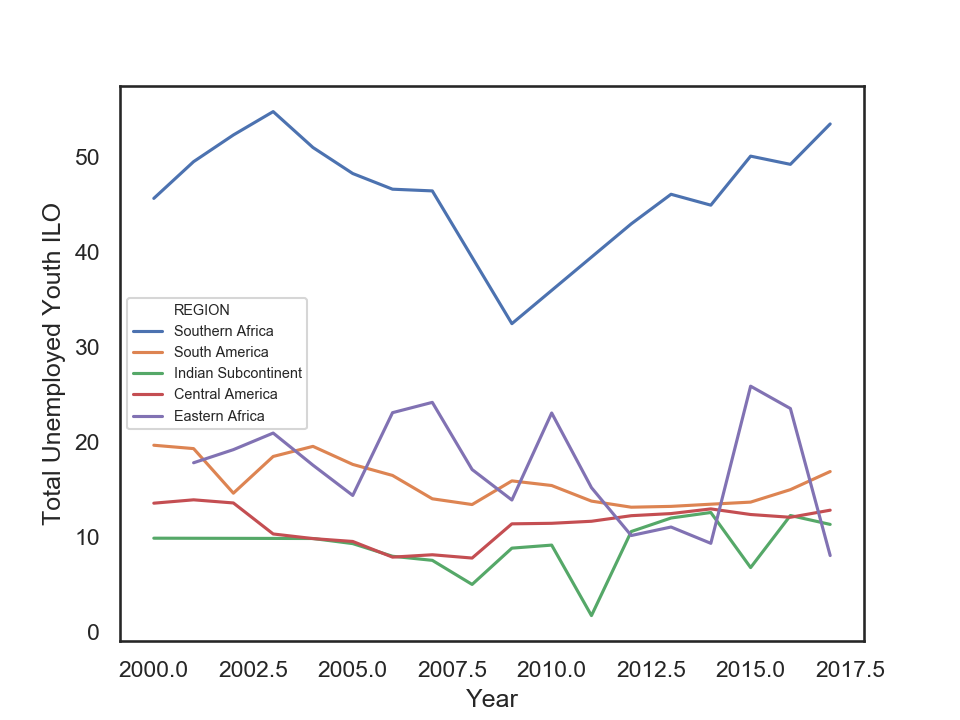

In [95]:
sns.set(style="white")
ax = sns.lineplot(x="Year", y="Total Unemployed Youth ILO", hue="REGION", ci=None, data=ref_data[ref_data["REGION"].isin(["Southern Africa", 
                                                                               "Eastern Africa", 
                                                                               "Central America",  
                                                                               "South America",
                                                                               "Indian Subcontinent"])])
# ax.plot()
ax.legend(fontsize="xx-small", loc=6)
# ax.set_xticklabels(labels=data.Year.unique(), rotation=30)

In [96]:
# #Determine the corrolation
# corr = data.corr(method='pearson')
# corr.to_csv("correlationAnalysis.csv")

# # Generate a mask for the upper triangle
# mask = np.zeros_like(corr, dtype=np.bool)
# mask[np.triu_indices_from(mask)] = True

# # Set up the matplotlib figure
# f, ax = plt.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = sns.diverging_palette(10, 240, n=9, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})

# #Add title and adjust tick roations
# plt.title('Pearson Correlation Variation: All parameters',
#          fontdict={'fontsize':14, 'fontweight':20}, y=1.0)
# plt.xticks(rotation='vertical')
# plt.yticks(rotation='horizontal')
# plt.subplots_adjust(bottom=0.3, left=0.25)
# plt.show()
# plt.savefig('NeelRoshania_Assignment4.png')
# # plt.savefig('NeelRoshania_Assignment4.eps', format='eps', dpi=1000)